In [ ]:
import os
import pandas as pd

# 1. 엑셀 파일이 저장된 폴더 경로 지정
base_dir = '/content/sample_data/미세먼지'  # 폴더 경로 입력 (코랩에 압축 파일 업로드 후 압축 해제한 폴더 경로)

# 2. 파일 탐색 (정렬 없이 모든 파일 탐색)
all_files = []
for root, dirs, files in os.walk(base_dir):
    for file in files:
        if file.endswith('.xlsx'):
            file_path = os.path.join(root, file)
            all_files.append(file_path)

# 3. 결과를 저장할 CSV 파일 경로
output_file = '/content/merged_file.csv'

# 4. 병합 수행
first_file = True  # 첫 번째 파일 여부를 확인
for file_path in all_files:
    temp_data = pd.read_excel(file_path)

    # 첫 번째 파일만 헤더 포함하여 저장, 이후 파일은 헤더 제외
    temp_data.to_csv(output_file, mode='a', index=False, header=first_file)
    first_file = False  # 첫 번째 파일 이후에는 헤더를 제외

print(f"모든 파일이 병합되었습니다. 결과는 '{output_file}'에 저장되었습니다.")


모든 파일이 병합되었습니다. 결과는 '/content/merged_file.csv'에 저장되었습니다.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


NameError: name 'filtered_df_path' is not defined

In [ ]:
import pandas as pd

# CSV 파일 경로
file_path = '/content/drive/MyDrive/MNIST/미세먼지_정량.csv'

# CSV 파일 읽기
data = pd.read_csv(file_path)

# 결측값 제거
data = data.dropna()

# 값이 0인 행 제거
columns_to_check = ['SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM25']
for col in columns_to_check:
    data = data[data[col] != 0]

# 지역, 망, 측정소코드, 측정소명 열 삭제
columns_to_drop = ['지역', '망', '측정소코드', '측정소명']
data = data.drop(columns=columns_to_drop)

# 측정일시에서 Year와 Month 추출
data['Year'] = data['측정일시'].astype(str).str[:4]
data['Month'] = data['측정일시'].astype(str).str[4:6]

# 기존 측정일시 열 삭제
data = data.drop(columns=['측정일시'])

# 데이터프레임 정보 출력
print("데이터 전처리 후 정보:")
print(data.info())

# 전처리 후 데이터를 새로운 파일로 저장
output_path = '/content/drive/MyDrive/MNIST/미세먼지_정량_작업용.csv'
data.to_csv(output_path, index=False, encoding='utf-8-sig')

print(f"전처리된 데이터가 '{output_path}' 파일로 저장되었습니다.")


<ipython-input-3-228abf4464ac>:7: DtypeWarning: Columns (2,4,5,6,7,8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


데이터 전처리 후 정보:
<class 'pandas.core.frame.DataFrame'>
Index: 21222981 entries, 0 to 24180291
Data columns (total 9 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   SO2     object
 1   CO      object
 2   O3      object
 3   NO2     object
 4   PM10    object
 5   PM25    object
 6   주소      object
 7   Year    object
 8   Month   object
dtypes: object(9)
memory usage: 1.6+ GB
None
전처리된 데이터가 '/content/drive/MyDrive/MNIST/미세먼지_정량_작업용.csv' 파일로 저장되었습니다.


In [ ]:
import pandas as pd

# 저장된 파일 로드
output_path = '/content/drive/MyDrive/MNIST/미세먼지_정량_작업용.csv'
data = pd.read_csv(output_path)

# 컬럼명 추출
columns = data.columns.tolist()

# 출력
print("Columns in the dataset:")
print(columns)


<ipython-input-6-21f68f2b96b5>:5: DtypeWarning: Columns (0,1,2,3,4,5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(output_path)


Columns in the dataset:
['SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM25', '주소', 'Year', 'Month']


In [ ]:
import pandas as pd

# CSV 파일 경로
file_path = '/content/drive/MyDrive/MNIST/미세먼지_정량_작업용.csv'

# CSV 파일 읽기
data = pd.read_csv(file_path)

# 결측값 제거
data = data.dropna()

# 데이터 타입 변환 (object -> float)
columns_to_convert = ['SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM25']
for col in columns_to_convert:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# 결측값 다시 제거 (숫자로 변환 불가한 값)
data = data.dropna()

# 지표별 점수화 기준 함수 정의
def categorize_so2(value):
    if value <= 0.02:
        return 1  # 좋음 (+1)
    elif value <= 0.04:
        return 0  # 보통 (0)
    else:
        return -1  # 나쁨 (-1)

def categorize_co(value):
    if value <= 1:
        return 1
    elif value <= 9:
        return 0
    else:
        return -1

def categorize_o3(value):
    if 0.03 <= value <= 0.06:
        return 1  # 적정 범위 (+1)
    else:
        return -1  # 나쁨 (-1)

def categorize_no2(value):
    if value <= 0.03:
        return 1
    elif value <= 0.06:
        return 0
    else:
        return -1

def categorize_pm10(value):
    if value <= 30:
        return 1
    elif value <= 80:
        return 0
    else:
        return -1

def categorize_pm25(value):
    if value <= 15:
        return 1
    elif value <= 35:
        return 0
    else:
        return -1


# 지표별 점수 부여
data['SO2_score'] = data['SO2'].apply(categorize_so2)
data['CO_score'] = data['CO'].apply(categorize_co)
data['O3_score'] = data['O3'].apply(categorize_o3)
data['NO2_score'] = data['NO2'].apply(categorize_no2)
data['PM10_score'] = data['PM10'].apply(categorize_pm10)
data['PM25_score'] = data['PM25'].apply(categorize_pm25)

# 가중치 정의
weights = {
    'SO2': 0.1,
    'CO': 0.1,
    'O3': 0.2,
    'NO2': 0.2,
    'PM10': 0.2,
    'PM25': 0.2
}

# 종합 점수 계산
data['종합점수'] = (
    data['SO2_score'] * weights['SO2'] +
    data['CO_score'] * weights['CO'] +
    data['O3_score'] * weights['O3'] +
    data['NO2_score'] * weights['NO2'] +
    data['PM10_score'] * weights['PM10'] +
    data['PM25_score'] * weights['PM25']
)

# 점수 미리보기
print(data[['Year', 'Month','SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM25', '종합점수']].head())

# 전처리된 데이터 저장
output_path = '/content/drive/MyDrive/MNIST/미세먼지_정량_작업용_점수화.csv'
data.to_csv(output_path, index=False, encoding='utf-8-sig')

print(f"점수화된 데이터가 '{output_path}'에 저장되었습니다.")


<ipython-input-5-ded8d1e18f45>:7: DtypeWarning: Columns (0,1,2,3,4,5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


   Year  Month    SO2   CO     O3    NO2  PM10  PM25  종합점수
0  2020   10.0  0.003  0.3  0.020  0.012  16.0   8.0   0.6
1  2020   10.0  0.002  0.3  0.025  0.007   8.0   4.0   0.6
2  2020   10.0  0.002  0.3  0.022  0.008   8.0   3.0   0.6
3  2020   10.0  0.002  0.3  0.023  0.007   7.0   4.0   0.6
4  2020   10.0  0.003  0.3  0.024  0.006   7.0   5.0   0.6
점수화된 데이터가 '/content/drive/MyDrive/MNIST/미세먼지_정량_작업용_점수화.csv'에 저장되었습니다.


In [ ]:
# 필요한 열만 선택하여 새로운 데이터프레임 생성
selected_columns = ['종합점수', 'Year', 'Month']
filtered_data = data[selected_columns]

# 결과 출력
print(filtered_data.head())

# 필터링된 데이터 저장
output_path = '/content/drive/MyDrive/MNIST/241208_미세먼지_종합점수.csv'
filtered_data.to_csv(output_path, index=False, encoding='utf-8-sig')

print(f"필터링된 데이터가 '{output_path}'에 저장되었습니다.")


   종합점수  Year  Month
0   0.6  2020   10.0
1   0.6  2020   10.0
2   0.6  2020   10.0
3   0.6  2020   10.0
4   0.6  2020   10.0
필터링된 데이터가 '/content/drive/MyDrive/MNIST/241208_미세먼지_종합점수.csv'에 저장되었습니다.


In [ ]:
import pandas as pd

# 데이터 로드
file_path = '/content/drive/MyDrive/MNIST/녹조_종합점수_필터링.csv'
data = pd.read_csv(file_path)

# 'Category' 열 추가 및 값 채우기
data.insert(0, 'Category', '녹조')  # 맨 앞 열에 'Category' 추가하고 '녹조'로 채움

# 결과 확인
print(data.head())

# 데이터 저장
output_path = '/content/drive/MyDrive/MNIST/녹조_종합점수final.csv'
data.to_csv(output_path, index=False, encoding='utf-8-sig')

print(f"'Category' 열이 추가된 데이터가 '{output_path}'에 저장되었습니다.")


  Category  종합점수  Year  Month
0       녹조   0.0  2024      4
1       녹조   0.1  2024      4
2       녹조   0.3  2024      4
3       녹조   0.2  2024      4
4       녹조   0.2  2024      4
'Category' 열이 추가된 데이터가 '/content/drive/MyDrive/MNIST/녹조_종합점수final.csv'에 저장되었습니다.


In [ ]:
import pandas as pd

# 데이터 로드
file_path = '/content/drive/MyDrive/MNIST/미세먼지_종합점수.csv'
data = pd.read_csv(file_path)

# 'Category' 열 추가 및 값 채우기
data.insert(0, 'Category', '미세먼지')  # 맨 앞 열에 'Category' 추가하고 '녹조'로 채움

# 결과 확인
print(data.head())

# 데이터 저장
output_path = '/content/drive/MyDrive/MNIST/미세먼지_종합점수final.csv'
data.to_csv(output_path, index=False, encoding='utf-8-sig')

print(f"'Category' 열이 추가된 데이터가 '{output_path}'에 저장되었습니다.")


  Category  종합점수  Year  Month
0     미세먼지   0.6  2020   10.0
1     미세먼지   0.6  2020   10.0
2     미세먼지   0.6  2020   10.0
3     미세먼지   0.6  2020   10.0
4     미세먼지   0.6  2020   10.0
'Category' 열이 추가된 데이터가 '/content/drive/MyDrive/MNIST/미세먼지_종합점수final.csv'에 저장되었습니다.


In [ ]:
import pandas as pd
import numpy as np

# 1. 데이터 로드
existing_file_path = '/content/drive/MyDrive/MNIST/미세먼지_종합점수_2019_2024_추세반영_수정.csv'
trend_file_path = '/content/drive/MyDrive/MNIST/수정된_분석결과(241208).csv'

# 기존 파일 로드
existing_df = pd.read_csv(existing_file_path)

# 수정된 분석결과 데이터 로드
trend_df = pd.read_csv(trend_file_path)

# 2. 2023~2024년 '미세먼지' 월별 평균 추세 계산
trend_mean = trend_df[trend_df['Year'] >= 2023].groupby(['Month'])['미세먼지'].mean().reset_index()

# 3. 2019~2024년 전체 Year, Month 생성
all_years = pd.DataFrame({
    'Year': np.repeat(range(2019, 2025), 12),
    'Month': list(range(1, 13)) * 6
})

# 기존 데이터와 병합 (누락된 연도 및 월을 생성)
expanded_df = pd.merge(all_years, existing_df, on=['Year', 'Month'], how='outer')

# 4. 결측치 채우기
# (1) Category가 없는 경우 '미세먼지'로 채우기
expanded_df['Category'] = expanded_df['Category'].fillna('미세먼지')

# (2) 종합점수 결측치 채우기 - 추세 반영 및 1점 제한
def fill_nan_with_trend(row):
    if pd.isna(row['종합점수']):
        # 추세 데이터에서 일치하는 Month의 미세먼지 값 가져오기
        matching_trend = trend_mean[trend_mean['Month'] == row['Month']]
        if not matching_trend.empty:
            # 추세 값 가져오기
            trend_value = matching_trend['미세먼지'].values[0]
            # ±10% 변동 범위로 랜덤 값 생성 (추세 값이 1을 넘지 않도록)
            random_value = np.random.uniform(max(0, 0.9 * trend_value), min(1, 1.1 * trend_value))
            return random_value
    return row['종합점수']

expanded_df['종합점수'] = expanded_df.apply(fill_nan_with_trend, axis=1)

# 5. 결과 저장
output_path = '/content/drive/MyDrive/MNIST/미세먼지_종합점수_2019_2024_추세반영_최종.csv'
expanded_df.to_csv(output_path, index=False, encoding='utf-8-sig')

print(f"기존 데이터에 새 데이터를 추가하여 저장했습니다: {output_path}")


기존 데이터에 새 데이터를 추가하여 저장했습니다: /content/drive/MyDrive/MNIST/미세먼지_종합점수_2019_2024_추세반영_최종.csv


In [ ]:
# 4. 결측치 채우기
# (1) Category가 없는 경우 '미세먼지'로 채우기
expanded_df['Category'] = expanded_df['Category'].fillna('미세먼지')

In [ ]:
# 5. 결과 저장
output_path = '/content/drive/MyDrive/MNIST/미세먼지_종합점수_2019_2024_추세반영_수정.csv'
expanded_df.to_csv(output_path, index=False, encoding='utf-8-sig')

In [ ]:
category_counts = expanded_df['Month'].value_counts()
print(category_counts)


Month
10    737387
4     706159
5     423063
12    366511
11    338941
1          6
2          6
3          6
6          6
7          6
8          6
9          6
Name: count, dtype: int64


In [ ]:
print(expanded_df[expanded_df['종합점수'].isnull()])

Empty DataFrame
Columns: [Year, Month, Category, 종합점수]
Index: []


In [ ]:
# CSV 파일 저장 경로
output_path = '/content/drive/MyDrive/MNIST/미세먼지_종합점수_추출.csv'

# CSV 파일로 저장
filtered_data.to_csv(output_path, index=False, encoding='utf-8-sig')

print(f"필요한 열만 포함된 데이터가 '{output_path}'에 저장되었습니다.")


NameError: name 'filtered_data' is not defined

In [ ]:
import pandas as pd

# 저장된 파일 로드
output_path = '/content/drive/MyDrive/MNIST/미세먼지_정량_작업용_점수화.csv'
data = pd.read_csv(output_path)

# 컬럼명 추출
columns = data.columns.tolist()

# 출력
print("Columns in the dataset:")
print(columns)


Columns in the dataset:
['SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM25', '주소', 'Year', 'Month', 'SO2_score', 'CO_score', 'O3_score', 'NO2_score', 'PM10_score', 'PM25_score', '종합점수']


In [ ]:
# 데이터 개수 출력
print(f"총 데이터 개수: {len(data)}")

총 데이터 개수: 24180292


In [ ]:
# 맨 아래 5행 출력
print("Bottom 5 rows:")
print(data.tail())


Bottom 5 rows:
              지역       망   측정소코드 측정소명        측정일시     SO2    CO      O3  \
24180287  인천 옹진군  국가배경농도  831495   울도  2023073120  0.0019  0.39  0.0186   
24180288  인천 옹진군  국가배경농도  831495   울도  2023073121  0.0018  0.39  0.0192   
24180289  인천 옹진군  국가배경농도  831495   울도  2023073122  0.0018  0.39  0.0157   
24180290  인천 옹진군  국가배경농도  831495   울도  2023073123  0.0019   0.4  0.0146   
24180291  인천 옹진군  국가배경농도  831495   울도  2023073124  0.0019  0.39  0.0146   

             NO2  PM10 PM25                   주소  
24180287  0.0022  16.0  9.0  인천 옹진군 덕적면 울도리 85번지  
24180288  0.0028  10.0  6.0  인천 옹진군 덕적면 울도리 85번지  
24180289   0.006  15.0  6.0  인천 옹진군 덕적면 울도리 85번지  
24180290  0.0068  17.0  5.0  인천 옹진군 덕적면 울도리 85번지  
24180291  0.0039  15.0  5.0  인천 옹진군 덕적면 울도리 85번지  


In [ ]:
# 열 이름의 공백 제거
data.columns = data.columns.str.strip()

# 필요한 열만 선택
columns_to_keep = ['지역', '망', '측정소코드', '측정소명', '측정일시', 'SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM25']
data = data[columns_to_keep]


In [ ]:
import pandas as pd

# CSV 파일 경로
file_path = '/content/drive/MyDrive/MNIST/미세먼지_정량.csv'

# CSV 파일 읽기
data = pd.read_csv(file_path, low_memory=False)

# '측정일시' 열의 데이터 유형 확인
print(data['측정일시'].dtype)

# '측정일시' 열의 고유 값 확인
print(data['측정일시'].unique())

# '측정일시' 열의 값 중 숫자로 변환할 수 없는 값 찾기
invalid_values = data[~data['측정일시'].str.isnumeric()]
print(invalid_values)

# 숫자로 변환할 수 없는 값이 있는 행 제거
data = data[data['측정일시'].str.isnumeric()]

# '측정일시'를 문자열로 변환
data['측정일시'] = data['측정일시'].astype(str)

# 연도와 월 추출
data['연도'] = data['측정일시'].str[:4].astype(int)
data['월'] = data['측정일시'].str[4:6].astype(int)

# 결과 확인
print(data.head())


object
['2020100101' '2020100102' '2020100103' ... '2023073122' '2023073123'
 '2023073124']
         지역  망  측정소코드  측정소명  측정일시  SO2  CO  O3  NO2  PM10  PM25  주소
1242962  지역  망  측정소코드  측정소명  측정일시  SO2  CO  O3  NO2  PM10  PM25  주소
      지역     망   측정소코드 측정소명        측정일시    SO2   CO     O3    NO2  PM10 PM25  \
0  서울 중구  도시대기  111121   중구  2020100101  0.003  0.3   0.02  0.012  16.0  8.0   
1  서울 중구  도시대기  111121   중구  2020100102  0.002  0.3  0.025  0.007   8.0  4.0   
2  서울 중구  도시대기  111121   중구  2020100103  0.002  0.3  0.022  0.008   8.0  3.0   
3  서울 중구  도시대기  111121   중구  2020100104  0.002  0.3  0.023  0.007   7.0  4.0   
4  서울 중구  도시대기  111121   중구  2020100105  0.003  0.3  0.024  0.006   7.0  5.0   

              주소    연도   월  
0  서울 중구 덕수궁길 15  2020  10  
1  서울 중구 덕수궁길 15  2020  10  
2  서울 중구 덕수궁길 15  2020  10  
3  서울 중구 덕수궁길 15  2020  10  
4  서울 중구 덕수궁길 15  2020  10  


In [ ]:
# 오염물질 농도 열을 숫자형으로 변환
pollutants = ['SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM25']
for pollutant in pollutants:
    data[pollutant] = pd.to_numeric(data[pollutant], errors='coerce')

# 결측치 제거
data = data.dropna(subset=pollutants)


In [ ]:
# 연도와 월별 평균 계산
monthly_avg = data.groupby(['연도', '월'])[pollutants].mean().reset_index()


In [ ]:
# 변화 추이 분석
for pollutant in pollutants:
    monthly_avg[f'{pollutant}_변화'] = monthly_avg[pollutant].diff().apply(
        lambda x: '증가' if x > 0 else ('감소' if x < 0 else '변화 없음')
    )

# 긍정/부정 평가
def evaluate_change(row):
    evaluation = {}
    for pollutant in pollutants:
        change = row[f'{pollutant}_변화']
        if change == '증가':
            evaluation[pollutant] = '부정적 영향'
        elif change == '감소':
            evaluation[pollutant] = '긍정적 영향'
        else:
            evaluation[pollutant] = '변화 없음'
    return evaluation

monthly_avg['평가'] = monthly_avg.apply(evaluate_change, axis=1)


In [ ]:
# 요약 문구 생성
summaries = []
for i in range(1, len(monthly_avg)):
    current_row = monthly_avg.iloc[i - 1]
    next_row = monthly_avg.iloc[i]
    summary = f"{int(next_row['연도'])}년 {int(next_row['월'])}월: "
    details = []
    for pollutant in pollutants:
        change = next_row[f'{pollutant}_변화']
        impact = next_row['평가'][pollutant]
        if change != '변화 없음':
            details.append(f"{pollutant} {change} ({impact})")
    summary += ", ".join(details) if details else "변화 없음"
    summaries.append(summary)


In [ ]:
# 결과 출력
for summary in summaries:
    print(summary)


2020년 2월: SO2 감소 (긍정적 영향), CO 감소 (긍정적 영향), O3 증가 (부정적 영향), NO2 감소 (긍정적 영향), PM10 감소 (긍정적 영향), PM25 감소 (긍정적 영향)
2020년 3월: SO2 감소 (긍정적 영향), CO 감소 (긍정적 영향), O3 증가 (부정적 영향), NO2 감소 (긍정적 영향), PM10 증가 (부정적 영향), PM25 감소 (긍정적 영향)
2020년 4월: SO2 감소 (긍정적 영향), CO 감소 (긍정적 영향), O3 증가 (부정적 영향), NO2 감소 (긍정적 영향), PM10 증가 (부정적 영향), PM25 감소 (긍정적 영향)
2020년 5월: SO2 감소 (긍정적 영향), CO 증가 (부정적 영향), O3 감소 (긍정적 영향), NO2 감소 (긍정적 영향), PM10 감소 (긍정적 영향), PM25 감소 (긍정적 영향)
2020년 6월: SO2 증가 (부정적 영향), CO 증가 (부정적 영향), O3 증가 (부정적 영향), NO2 증가 (부정적 영향), PM10 증가 (부정적 영향), PM25 증가 (부정적 영향)
2020년 7월: SO2 감소 (긍정적 영향), CO 감소 (긍정적 영향), O3 감소 (긍정적 영향), NO2 감소 (긍정적 영향), PM10 감소 (긍정적 영향), PM25 감소 (긍정적 영향)
2020년 8월: SO2 증가 (부정적 영향), CO 감소 (긍정적 영향), O3 감소 (긍정적 영향), NO2 감소 (긍정적 영향), PM10 증가 (부정적 영향), PM25 증가 (부정적 영향)
2020년 9월: SO2 감소 (긍정적 영향), CO 증가 (부정적 영향), O3 증가 (부정적 영향), NO2 증가 (부정적 영향), PM10 감소 (긍정적 영향), PM25 감소 (긍정적 영향)
2020년 10월: SO2 증가 (부정적 영향), CO 증가 (부정적 영향), O3 감소 (긍정적 영향), NO2 증가 (부정적 영향), PM10 증가 (부정적 영향), PM25 증가 (부정적 영향)


In [ ]:
import pandas as pd

# CSV 파일 경로
file_path = '/content/drive/MyDrive/MNIST/미세먼지_정량.csv'

# CSV 파일 읽기
data = pd.read_csv(file_path, low_memory=False)

# '측정일시' 열의 데이터 유형 확인
print(data['측정일시'].dtype)

# '측정일시' 열의 고유 값 확인
print(data['측정일시'].unique())

# '측정일시' 열의 값 중 숫자로 변환할 수 없는 값 찾기
invalid_values = data[~data['측정일시'].str.isnumeric()]
print(invalid_values)

# 숫자로 변환할 수 없는 값이 있는 행 제거
data = data[data['측정일시'].str.isnumeric()]

# '측정일시'를 문자열로 변환
data['측정일시'] = data['측정일시'].astype(str)

# 연도와 월 추출
data['연도'] = data['측정일시'].str[:4].astype(int)
data['월'] = data['측정일시'].str[4:6].astype(int)


# 오염물질 목록
pollutants = ['SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM25']

# 오염물질 농도 열을 숫자형으로 변환
for pollutant in pollutants:
    data[pollutant] = pd.to_numeric(data[pollutant], errors='coerce')

# 결측치 제거
data = data.dropna(subset=pollutants)

# 연도와 월별 평균 계산
monthly_avg = data.groupby(['연도', '월'])[pollutants].mean().reset_index()

# 변화 추이 분석 및 긍정/부정 평가
summaries = []
for i in range(1, len(monthly_avg)):
    current_row = monthly_avg.iloc[i - 1]
    next_row = monthly_avg.iloc[i]
    if current_row['연도'] == next_row['연도']:  # 같은 연도 내에서만 비교
        text = f"{int(next_row['연도'])}년 {int(next_row['월'])}월에는 "
        changes = []
        for pollutant in pollutants:
            if next_row[pollutant] > current_row[pollutant]:
                change = '증가'
                impact = '나빠짐'
            elif next_row[pollutant] < current_row[pollutant]:
                change = '감소'
                impact = '좋아짐'
            else:
                change = '변화 없음'
                impact = '변화 없음'
            if change != '변화 없음':
                changes.append(f"{pollutant}이 {impact}.")
        text += " ".join(changes)
        summaries.append({'연도': next_row['연도'], '월': next_row['월'], '요약': text})

# 결과를 데이터프레임으로 저장
summary_df = pd.DataFrame(summaries)

# 결과 저장
summary_df.to_csv('/content/drive/MyDrive/MNIST/대기환경_정량_데이터.csv', index=False, encoding='utf-8-sig')

# 결과 확인
print(summary_df.head(10))

object
['2020100101' '2020100102' '2020100103' ... '2023073122' '2023073123'
 '2023073124']
         지역  망  측정소코드  측정소명  측정일시  SO2  CO  O3  NO2  PM10  PM25  주소
1242962  지역  망  측정소코드  측정소명  측정일시  SO2  CO  O3  NO2  PM10  PM25  주소
       연도     월                                                 요약
0  2020.0   2.0  2020년 2월에는 SO2이 좋아짐. CO이 좋아짐. O3이 나빠짐. NO2이 좋아...
1  2020.0   3.0  2020년 3월에는 SO2이 좋아짐. CO이 좋아짐. O3이 나빠짐. NO2이 좋아...
2  2020.0   4.0  2020년 4월에는 SO2이 좋아짐. CO이 좋아짐. O3이 나빠짐. NO2이 좋아...
3  2020.0   5.0  2020년 5월에는 SO2이 좋아짐. CO이 나빠짐. O3이 좋아짐. NO2이 좋아...
4  2020.0   6.0  2020년 6월에는 SO2이 나빠짐. CO이 나빠짐. O3이 나빠짐. NO2이 나빠...
5  2020.0   7.0  2020년 7월에는 SO2이 좋아짐. CO이 좋아짐. O3이 좋아짐. NO2이 좋아...
6  2020.0   8.0  2020년 8월에는 SO2이 나빠짐. CO이 좋아짐. O3이 좋아짐. NO2이 좋아...
7  2020.0   9.0  2020년 9월에는 SO2이 좋아짐. CO이 나빠짐. O3이 나빠짐. NO2이 나빠...
8  2020.0  10.0  2020년 10월에는 SO2이 나빠짐. CO이 나빠짐. O3이 좋아짐. NO2이 나...
9  2020.0  11.0  2020년 11월에는 SO2이 나빠짐. CO이 나빠짐. O3이 좋아짐. NO2이 나...


In [ ]:
import pandas as pd

# summary_df에 'datatype' 열과 'category' 열 추가
summary_df['datatype'] = '정량'
summary_df['category'] = '미세먼지'

# 결과 저장
output_file_path = '/content/drive/MyDrive/MNIST/대기환경_정량_데이터.csv'
summary_df.to_csv(output_file_path, index=False, encoding='utf-8-sig')

# 결과 확인
print(summary_df.head(10))


       연도     월                                                 요약 datatype  \
0  2020.0   2.0  2020년 2월에는 SO2이 좋아짐. CO이 좋아짐. O3이 나빠짐. NO2이 좋아...       정량   
1  2020.0   3.0  2020년 3월에는 SO2이 좋아짐. CO이 좋아짐. O3이 나빠짐. NO2이 좋아...       정량   
2  2020.0   4.0  2020년 4월에는 SO2이 좋아짐. CO이 좋아짐. O3이 나빠짐. NO2이 좋아...       정량   
3  2020.0   5.0  2020년 5월에는 SO2이 좋아짐. CO이 나빠짐. O3이 좋아짐. NO2이 좋아...       정량   
4  2020.0   6.0  2020년 6월에는 SO2이 나빠짐. CO이 나빠짐. O3이 나빠짐. NO2이 나빠...       정량   
5  2020.0   7.0  2020년 7월에는 SO2이 좋아짐. CO이 좋아짐. O3이 좋아짐. NO2이 좋아...       정량   
6  2020.0   8.0  2020년 8월에는 SO2이 나빠짐. CO이 좋아짐. O3이 좋아짐. NO2이 좋아...       정량   
7  2020.0   9.0  2020년 9월에는 SO2이 좋아짐. CO이 나빠짐. O3이 나빠짐. NO2이 나빠...       정량   
8  2020.0  10.0  2020년 10월에는 SO2이 나빠짐. CO이 나빠짐. O3이 좋아짐. NO2이 나...       정량   
9  2020.0  11.0  2020년 11월에는 SO2이 나빠짐. CO이 나빠짐. O3이 좋아짐. NO2이 나...       정량   

  category  
0     미세먼지  
1     미세먼지  
2     미세먼지  
3     미세먼지  
4     미세먼지  
5     미세먼지  
6     미세먼지  
7     미세먼지  
8     미세먼지  


<ipython-input-11-44aa81072b07>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['년도월'] = pd.to_datetime(filtered_data['년도'].astype(str) + '-' + filtered_data['월'].astype(str))
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 13197 (\N{SQUARE MU G}) missing from current font.
  fig.canvas.print_figure(bytes_io,

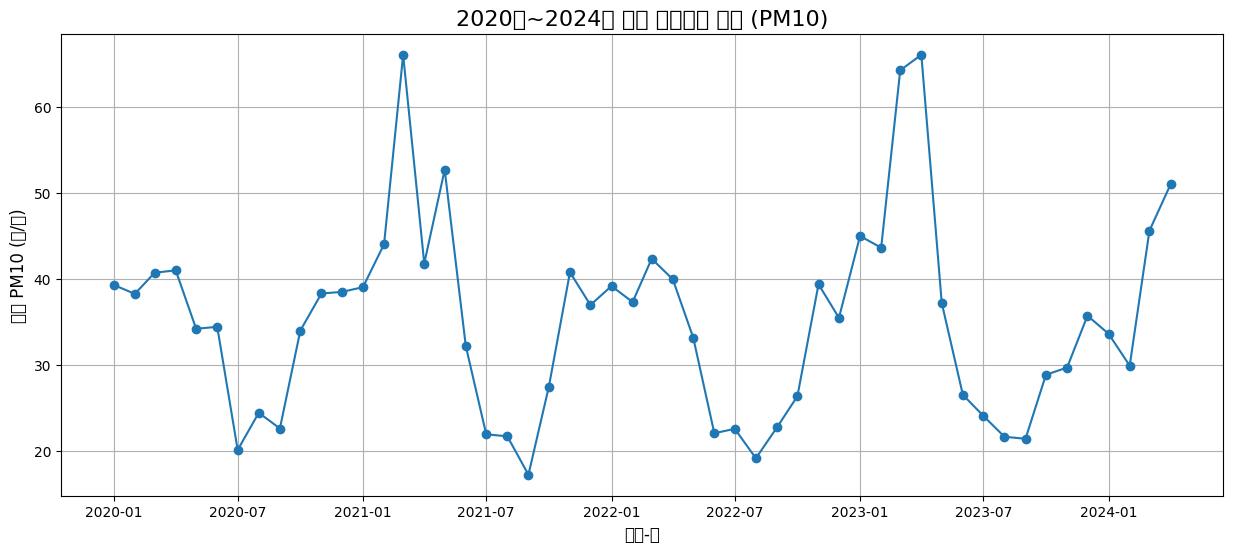

In [ ]:
import matplotlib.pyplot as plt

# PM10 값이 0이 아닌 데이터만 필터링
filtered_data = monthly_avg[monthly_avg['PM10'] != 0]

# 년도와 월을 결합해 시계열 데이터 생성
filtered_data['년도월'] = pd.to_datetime(filtered_data['년도'].astype(str) + '-' + filtered_data['월'].astype(str))

# 시계열 그래프 그리기
plt.figure(figsize=(15, 6))
plt.plot(filtered_data['년도월'], filtered_data['PM10'], marker='o')
plt.title('2020년~2024년 월별 미세먼지 평균 (PM10)', fontsize=16)
plt.xlabel('년도-월', fontsize=12)
plt.ylabel('평균 PM10 (㎍/㎥)', fontsize=12)
plt.grid()
plt.show()
